In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2025-06-19 15:00:33.348802: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-19 15:00:33.832107: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-19 15:00:34.107669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750338034.293590    1066 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750338034.343309    1066 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750338035.249548    1066 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #qua prende i dati predefiniti

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
Y_train shape: (60000,)


In [3]:
type(X_test)

numpy.ndarray

In [4]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

X_train shape: (60000, 784)
X_test shape: (10000, 784)



an example of a data point with label 4


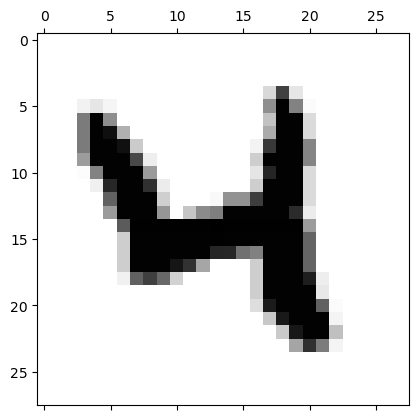

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [5]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

la forma di X_train sarebbe 60000 (numero di immagini per il training contenenti i disegni degli interi) ,  784, sono il numero di pixel contenuti da ciascuna immagine, che da matrice sono stati "appiattiti" ad un vettore monodimensionale.
Y_train sono gli outputo, ho 60000 elementi ciascuno è un vettore che rappresenta un intero come vettore binario.

##  Step 2

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout   

def create_DNN(): # DNN = deep neural network
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer  
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax')) #num-classes = 10 -> digits
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


## Step 3

In [7]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model( opt_name = 'SGD'): #se non gli passo niente lui va avanti con sgd
    # create the model
    model=create_DNN() 

    optimizers_dict = {
        'SGD': SGD(),
        'Adam': Adam(),
        'RMSprop': RMSprop(),
        'Adagrad': Adagrad(),
        'Adadelta': Adadelta(),
        'Adamax': Adamax(),
        'Nadam': Nadam()
    }
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


## Step 4

In [8]:
print('Y_train shape:', Y_train.shape)


Y_train shape: (60000, 10)


In [9]:
# training parameters
batch_size = 32
epochs = 3
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

model_DNN_adam = compile_model("Adam")

# train DNN and store training info in history
history_adam = model_DNN_adam.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

model_DNN_rms = compile_model("RMSprop")

# train DNN and store training info in history
history_rms = model_DNN_rms.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=1,
          validation_data=(X_test, Y_test))

/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-19 15:00:49.919495: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/3


2025-06-19 15:00:52.048653: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6309 - loss: 1.1874

2025-06-19 15:01:10.931490: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.6314 - loss: 1.1859 - val_acc: 0.9126 - val_loss: 0.3191
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - acc: 0.8793 - loss: 0.4221 - val_acc: 0.9300 - val_loss: 0.2448
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - acc: 0.9081 - loss: 0.3331 - val_acc: 0.9402 - val_loss: 0.2071
Epoch 1/3


2025-06-19 15:01:50.300878: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.6434 - loss: 1.1591 - val_acc: 0.9132 - val_loss: 0.3211
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - acc: 0.8814 - loss: 0.4161 - val_acc: 0.9326 - val_loss: 0.2407
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9095 - loss: 0.3263 - val_acc: 0.9403 - val_loss: 0.2033
Epoch 1/3


2025-06-19 15:02:43.105136: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6472 - loss: 1.1575

2025-06-19 15:03:00.442311: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.6476 - loss: 1.1565 - val_acc: 0.9123 - val_loss: 0.3151
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - acc: 0.8783 - loss: 0.4228 - val_acc: 0.9291 - val_loss: 0.2398
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - acc: 0.9079 - loss: 0.3286 - val_acc: 0.9394 - val_loss: 0.2029


 17/313 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9501 - loss: 0.1886

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9292 - loss: 0.2436
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9281 - loss: 0.2381
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9273 - loss: 0.2386

Test loss: 0.20711399614810944
Test accuracy: 0.9401999711990356

Test loss: 0.203294575214386
Test accuracy: 0.9402999877929688

Test loss: 0.2028559148311615
Test accuracy: 0.9394000172615051







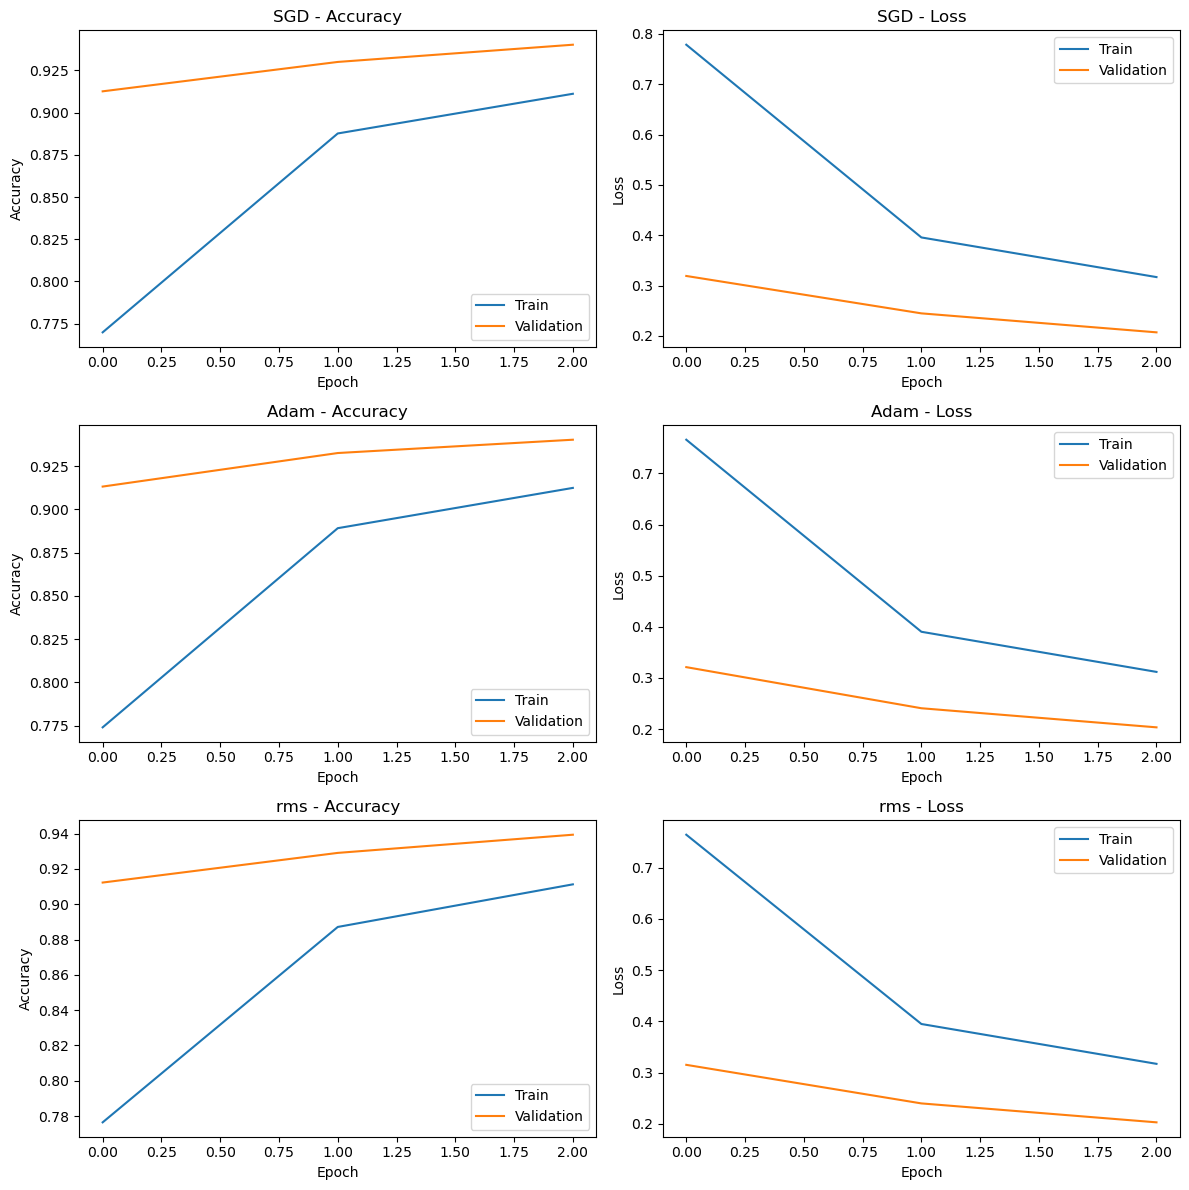

In [10]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1) #predizione sugli input x_test e valutazione tramite in confronto con gli output noti y_test
score_adam =  model_DNN_adam.evaluate(X_test, Y_test, verbose=1)
score_rms =  model_DNN_rms.evaluate(X_test, Y_test, verbose=1)


#SUL CAPIONE DI VALIDATION
# print performance SGD
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# print performance Adam

print()
print('Test loss:', score_adam[0])
print('Test accuracy:', score_adam[1])

# print performance RMS

print()
print('Test loss:', score_rms[0])
print('Test accuracy:', score_rms[1])
print("\n\n\n\n")

# look into training history

fig, axs = plt.subplots(3, 2, figsize=(12,12))  # 2 righe, 2 colonne

# --- SGD - Accuracy ---
axs[0, 0].plot(history.history['acc'])
axs[0, 0].plot(history.history['val_acc'])
axs[0, 0].set_title('SGD - Accuracy')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].legend(['Train', 'Validation'], loc='best')

# --- SGD - Loss ---
axs[0, 1].plot(history.history['loss'])
axs[0, 1].plot(history.history['val_loss'])
axs[0, 1].set_title('SGD - Loss')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].legend(['Train', 'Validation'], loc='best')

# --- Adam - Accuracy ---
axs[1, 0].plot(history_adam.history['acc'])
axs[1, 0].plot(history_adam.history['val_acc'])
axs[1, 0].set_title('Adam - Accuracy')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].legend(['Train', 'Validation'], loc='best')

# --- Adam - Loss ---
axs[1, 1].plot(history_adam.history['loss'])
axs[1, 1].plot(history_adam.history['val_loss'])
axs[1, 1].set_title('Adam - Loss')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].legend(['Train', 'Validation'], loc='best')


# --- rms accuracy ---
axs[2, 0].plot(history_rms.history['acc'])
axs[2, 0].plot(history_rms.history['val_acc'])
axs[2, 0].set_title('rms - Accuracy')
axs[2, 0].set_ylabel('Accuracy')
axs[2, 0].set_xlabel('Epoch')
axs[2, 0].legend(['Train', 'Validation'], loc='best')

# --- rms - Loss ---
axs[2, 1].plot(history_rms.history['loss'])
axs[2, 1].plot(history_rms.history['val_loss'])
axs[2, 1].set_title('rms - Loss')
axs[2, 1].set_ylabel('Loss')
axs[2, 1].set_xlabel('Epoch')
axs[2, 1].legend(['Train', 'Validation'], loc='best')


plt.tight_layout()
plt.show()


In [11]:
print(type(X_test))

<class 'numpy.ndarray'>


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


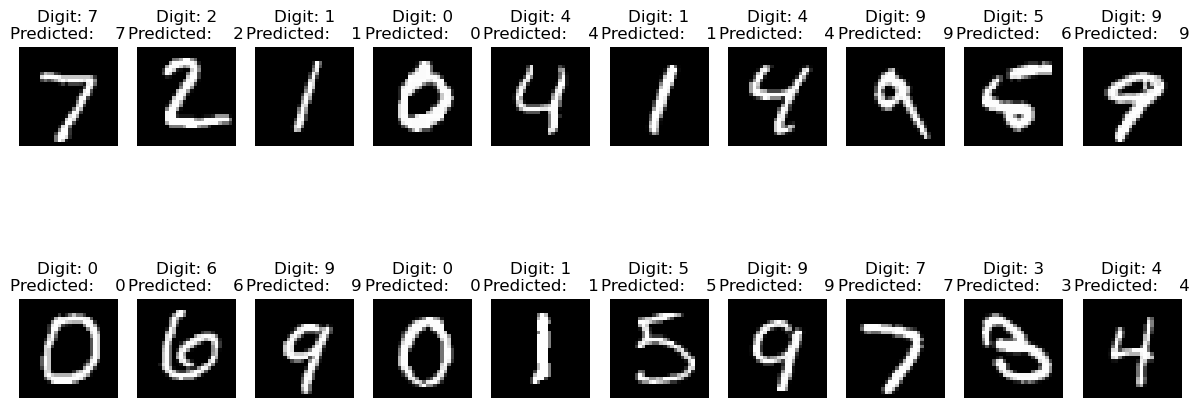

In [12]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1) #gli ultimi 3 parametri di fatto ci dicono le componenti della matrice, la prima ci dice il numero di elementi,
# di fatto ho ottenuto u4-dimesionale, un tensore, ovvero 10000 elementi che sono matrici 2D l'ultimo elemento serve a specificare i channels dell'immagine, 
#in questo caso è in bianco e nero quindi metto un solo channel.
plt.figure(figsize=(15, 6)) 
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()